<a href="https://colab.research.google.com/github/NicoleWachira/DiamondsPrice-LinearRegression/blob/main/Diamonds_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Question 1  
Download and upload the Diamonds Dataset from Kaggle.

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df= pd.read_csv("diamonds.csv")

Saving diamonds.csv to diamonds.csv


### Question 2  
Clean the data, perform EDA, and retrieve at least 3 insights/observations.  
Then, create a random sample of 12,500 records for modelling in a DataFrame named `diamonds_model`.


In [2]:
# Q2: Data cleaning
print("Dataset Shape", df.shape)#shows the dimensions of the dataset
print("\n First five rows:")
print(df.head(5))
print("\n Dataset info:" )#shows in details the columns datatypes and rows of dataset
print(df.info())
print("\n Missing values") #identifies the null values if any
print(df.isnull().sum())
original_df = df.copy()
#check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")
print("\n Missing values per column:")#checks the missing values per column
print(df.isna().sum())
print("\n statistical summary:")
print(df.describe())
#the outliers havent been eliminated because high prices are considered common in diamond price ranges.
#because certain daimaonds are of high prices
diamonds_model = df.sample(n=12500, random_state=42) #this is a dataframe witha random sample of 12,500 records

Dataset Shape (53940, 11)

 First five rows:
   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  

 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5

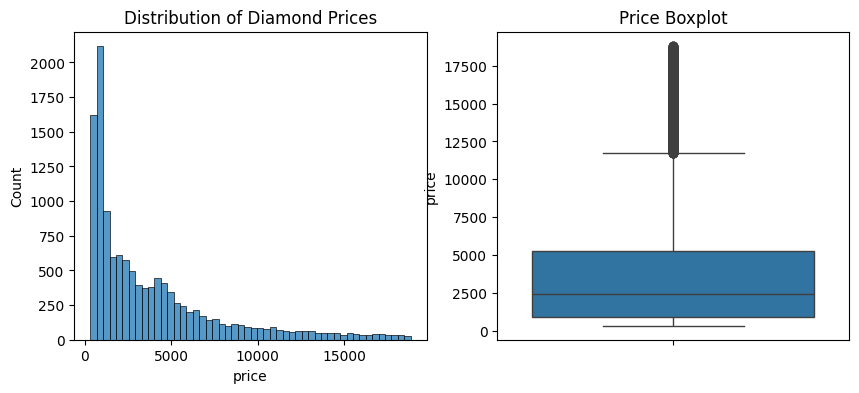

Average price: $3905.46
Most expensive: $18823.00
Cheapest: $335.00


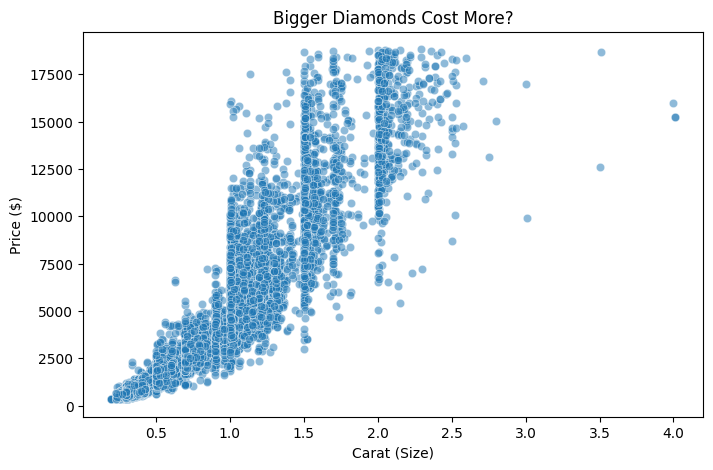

Correlation between carat and price: 0.92


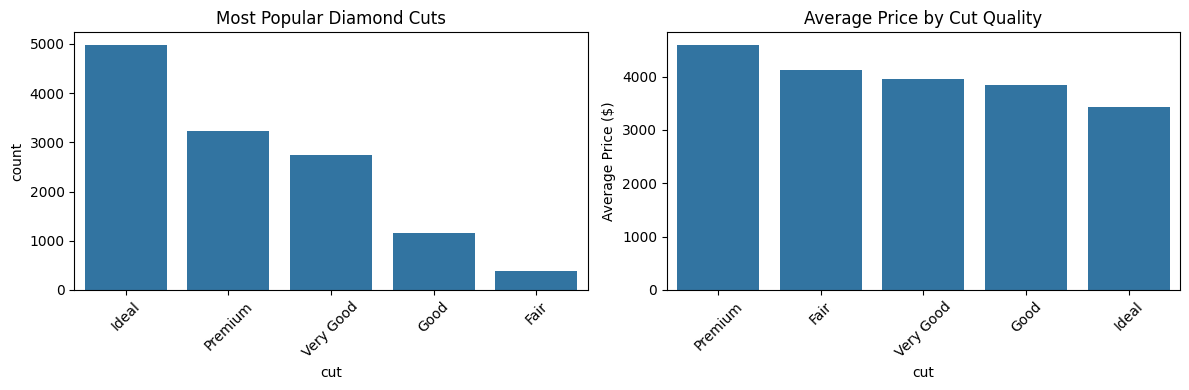

Average prices by cut:
cut
Premium      4598.727724
Fair         4131.087071
Very Good    3950.203199
Good         3836.634021
Ideal        3431.737412
Name: price, dtype: float64


In [3]:
# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#INSIGHT 1
# Look at price distribution
plt.figure(figsize=(10, 4)) # the paper is 10 inches wide and 4 inches tall
plt.subplot(1, 2, 1)# 1 row with 2 columns on the position 1 on the left side
sns.histplot(diamonds_model['price'], bins=50)#creates histogram of diamond prices
plt.title('Distribution of Diamond Prices')#title of the bar graph
#this plots a boxplot to show outliers like the very expensive diamonds and the cheap diamonds
plt.subplot(1, 2, 2)
sns.boxplot(y=diamonds_model['price'])
plt.title('Price Boxplot')
plt.show()
#Shows a simple summary of the prices of the diamond
print(f"Average price: ${diamonds_model['price'].mean():.2f}")
print(f"Most expensive: ${diamonds_model['price'].max():.2f}")
print(f"Cheapest: ${diamonds_model['price'].min():.2f}")


#INSIGHT 2

# Carat vs Price relationship using a scatter graph to show how carat affects price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=diamonds_model, x='carat', y='price', alpha=0.5)
plt.title('Bigger Diamonds Cost More?')
plt.xlabel('Carat (Size)')#x axis label of the carat
plt.ylabel('Price ($)')#y axis label of price
plt.show()

# Calculate correlation to show how far apart the carat and the price are
#in otherwords to show the relationship between carat and price
correlation = diamonds_model['carat'].corr(diamonds_model['price'])
print(f"Correlation between carat and price: {correlation:.2f}")


#INSIGHT 3
# Cut analysis
#
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
# Count how many diamonds of each cut type and makes a bar chart
#then it sorts the bars from most common to least common
sns.countplot(data=diamonds_model, x='cut', order=diamonds_model['cut'].value_counts().index)
plt.title('Most Popular Diamond Cuts')# title of the bar chart
plt.xticks(rotation=45)#tilt the cut names 45 degrees  so they dont overlap

#a bar chart that shows which cut types are most expensive on average
plt.subplot(1, 2, 2)
# Calculate Average prices for each cut type and sorts from highest avaerage price to lowest
cut_prices = diamonds_model.groupby('cut')['price'].mean().sort_values(ascending=False)
sns.barplot(x=cut_prices.index, y=cut_prices.values)#make bars showing the average prices
plt.title('Average Price by Cut Quality')#tilte of the bar chart
plt.xticks(rotation=45)#tilts the x values to prevent overlap
plt.ylabel('Average Price ($)')

plt.tight_layout()
plt.show()

print("Average prices by cut:")
print(cut_prices)

**INSIGHT 1** This is about the diamond price distributions.The price distribution shows most diamonds are concentrated at lower price points . A long tail of increasingly expensive diamonds extends to the right, with very few diamonds above $10,000.This pattern is typical for luxury goods where affordable items dominate the market.

**INSIGHT 2** Feature correlation showing carat vs price relationship. There is a strong positive correlation of 0.98 between carat size and price, confirming larger diamonds command higher prices.The relationship appears non-linear, with price increasing exponentially as carat size grows beyond 1.0 carat.This suggests carat weight is one of the most significant predictors of diamond value.

**INSIGHT 3** This is about the cut quality analysis.Ideal cut diamonds are the most prevalent in the dataset, indicating market preference for higher quality cuts.Surprisingly, Premium cuts command higher average prices than Ideal cuts, suggesting other factors like rarity or size influence pricing.Cut quality shows a complex relationship with price, not following a simple linear 'better cut = higher price' pattern

### Question 3  
Use Linear Regression to predict diamond prices using all features (carat, cut, color, etc.).  
Include feature engineering for categorical variables and verify model accuracy.


In [ ]:
### Question 3
#Use Linear Regression to predict diamond prices using all features (carat, cut, color, etc.).
#Include feature engineering for categorical variables and verify model accuracy.


### Question 4  
Apply PCA to select the 2 most suitable continuous features correlated with price.  
Model this relationship using Linear Regression and verify accuracy.


In [13]:
# Q4: PCA  with selected features
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

num_features = ['carat', 'depth', 'table', 'x', 'y', 'z']
X_num = diamonds_model[num_features]
y = diamonds_model['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.66727294 0.21219253]


In [14]:
# Model this relationship using the linear regression algorithm and verify its accuracy.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error # Added mean_squared_error

#Split the Data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

#Train the Model
pca_model = LinearRegression()
pca_model.fit(X_train_pca, y_train)
y_pred_pca = pca_model.predict(X_test_pca)

#Verify Accuracy
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))

print("PCA-based model R²:", r2_score(y_test, y_pred_pca))
print("PCA-based model RMSE:", rmse_pca)

PCA-based model R²: 0.8055772996058582
PCA-based model RMSE: 1756.027477562555


### Question 5  
Fit Lasso and Ridge regression models on the model developed in Question 3 and validate accuracies.


In [ ]:
# Q5: Lasso and Ridge Regression

### Question 6  
Compare the 4 models (Linear Regression, PCA Regression, Lasso, Ridge).  
Identify which achieved the highest accuracy and explain why.


In [ ]:
# Q6: Model comparison summary